In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/nagar/HelloPython/AnalyticalProjects/job-authentication/notebook/data/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.shape

(17880, 18)

In [6]:
df.size

321840

In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
text_cols = ['company_profile', 'description', 'requirements', 'benefits']
df[text_cols] = df[text_cols].fillna("")


In [9]:
cat_cols = ['location', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
df[cat_cols] = df[cat_cols].fillna("Unknown")


In [10]:
df['salary_range_clean'] = df['salary_range'].str.replace(r'[\$,]', '', regex=True)
df[['salary_min', 'salary_max']] = df['salary_range_clean'].str.split('-', expand=True)

df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')
df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2

In [11]:
def categorize_salary(salary):
    if pd.isna(salary):
        return 'Unknown'
    elif salary < 40000:
        return 'Low'
    elif 40000 <= salary < 80000:
        return 'Medium'
    elif 80000 <= salary < 150000:
        return 'High'
    else:
        return 'Very High'

df['salary_category'] = df['salary_avg'].apply(categorize_salary)


In [12]:
categories = ['Low', 'Medium', 'High', 'Very High', 'Unknown']

df_non_null = df[df['salary_avg'].notnull()].copy()

salary_qcut = pd.qcut(df_non_null['salary_avg'], q=4)

interval_to_label = dict(zip(salary_qcut.cat.categories, categories[:-1]))  
df_non_null['salary_category'] = salary_qcut.map(interval_to_label)

df_non_null['salary_category'] = df_non_null['salary_category'].astype(
    pd.CategoricalDtype(categories=categories, ordered=True)
)
df['salary_category'] = pd.Series(
    pd.Categorical(['Unknown'] * len(df), categories=categories, ordered=True),
    index=df.index
)
df.loc[df_non_null.index, 'salary_category'] = df_non_null['salary_category']
print(df['salary_category'].value_counts())


salary_category
Unknown      15039
Medium         783
Low            718
Very High      708
High           632
Name: count, dtype: int64


In [13]:
print(df['salary_category'].value_counts())
print(df['salary_category'].dtype)  


salary_category
Unknown      15039
Medium         783
Low            718
Very High      708
High           632
Name: count, dtype: int64
category


In [14]:
df['salary_category_encoded'] = df['salary_category'].cat.codes
print(df[['salary_category', 'salary_category_encoded']].tail())

      salary_category  salary_category_encoded
17875         Unknown                        4
17876         Unknown                        4
17877         Unknown                        4
17878         Unknown                        4
17879         Unknown                        4


In [15]:
categories = df['salary_category'].cat.categories
print("Category to code mapping:")
for code, category in enumerate(categories):
    print(f"{code} -> {category}")

Category to code mapping:
0 -> Low
1 -> Medium
2 -> High
3 -> Very High
4 -> Unknown


In [16]:
columns_to_drop = [
    'salary_range', 'salary_min', 'salary_max', 'salary_avg',
    'salary_category_x', 'salary_category_y', 'salary_range_clean', 'salary_category'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [17]:
df.isnull().sum()

job_id                         0
title                          0
location                       0
department                 11547
company_profile                0
description                    0
requirements                   0
benefits                       0
telecommuting                  0
has_company_logo               0
has_questions                  0
employment_type                0
required_experience            0
required_education             0
industry                       0
function                       0
fraudulent                     0
salary_category_encoded        0
dtype: int64

In [18]:
import pandas as pd

df['department_clean'] = df['department'].str.lower().str.strip()
df['department_clean'] = df['department_clean'].fillna('unknown')
dept_counts = df['department_clean'].value_counts()
rare_depts = dept_counts[dept_counts < 50].index
df['department_clean'] = df['department_clean'].apply(lambda x: 'other' if x in rare_depts else x)
le = LabelEncoder()
df['department_encoded'] = le.fit_transform(df['department_clean'])

print(f"Unique encoded departments: {df['department_encoded'].nunique()}")
print("Example department to encoded label mapping:")
print(dict(zip(le.classes_, range(len(le.classes_)))))


Unique encoded departments: 17
Example department to encoded label mapping:
{'customer service': 0, 'design': 1, 'development': 2, 'engineering': 3, 'finance': 4, 'hr': 5, 'information technology': 6, 'it': 7, 'marketing': 8, 'operations': 9, 'other': 10, 'product': 11, 'r&d': 12, 'sales': 13, 'tech': 14, 'technology': 15, 'unknown': 16}


In [19]:
df.nunique()

job_id                     17880
title                      11231
location                    3106
department                  1337
company_profile             1710
description                14802
requirements               11968
benefits                    6205
telecommuting                  2
has_company_logo               2
has_questions                  2
employment_type                6
required_experience            8
required_education            14
industry                     132
function                      38
fraudulent                     2
salary_category_encoded        5
department_clean              17
department_encoded            17
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['department', 'employment_type', 'required_experience', 'required_education', 
                    'industry', 'function', 'salary_category_encoded'] 
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 

In [21]:
cols_to_drop = [
    'job_id', 'department', 'department_clean']
df = df.drop(columns=cols_to_drop, errors='ignore')

In [22]:
text_cols = ['description', 'requirements', 'company_profile', 'benefits']
df[text_cols].apply(lambda x: x.str.len().describe())

,description,requirements,company_profile,benefits
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,1218.004418,590.132215,620.901454,208.895694
std,894.828620,613.191270,567.454100,337.077357
min,0.000000,0.000000,0.000000,0.000000
25%,607.000000,146.000000,138.000000,0.000000
50%,1017.000000,467.000000,570.000000,45.000000
75%,1586.000000,820.000000,879.000000,294.000000
max,14907.000000,10864.000000,6178.000000,4429.000000


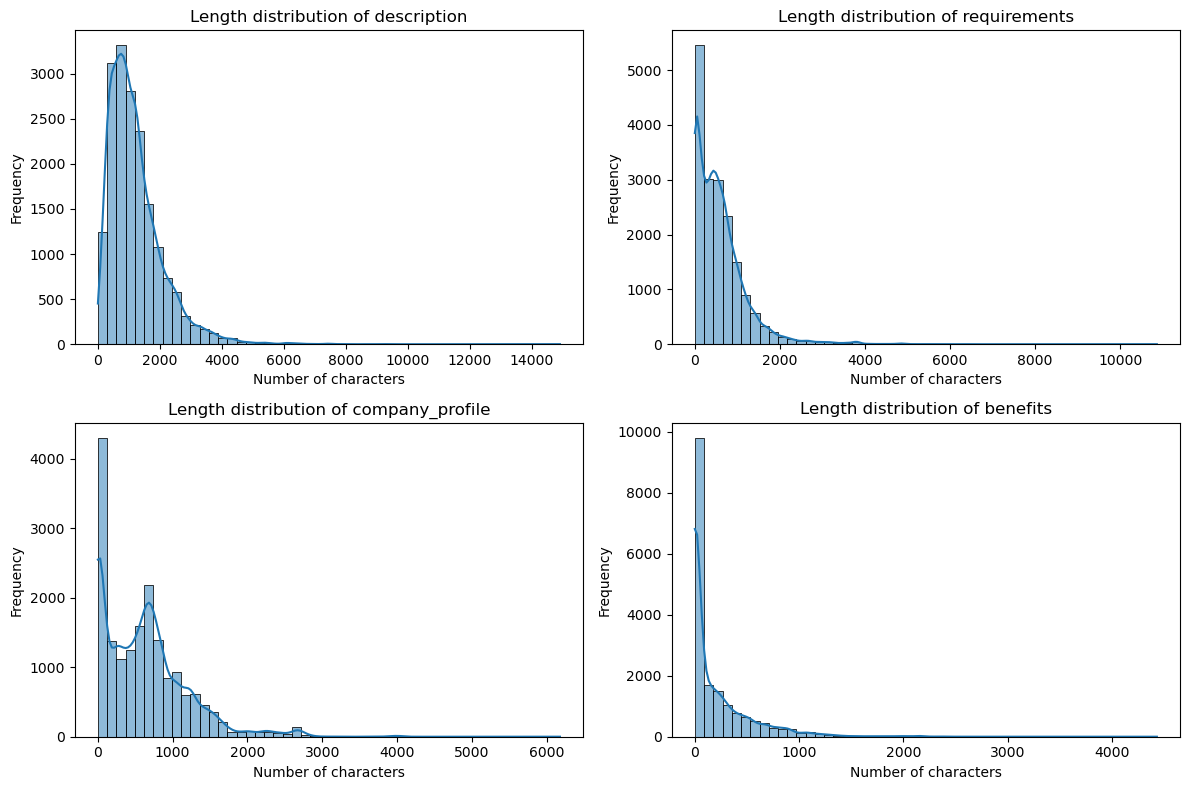

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = len(text_cols)

n_cols = 2
n_rows = int(np.ceil(num_cols / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(text_cols):
    sns.histplot(df[col].str.len(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Length distribution of {col}")
    axes[i].set_xlabel("Number of characters")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [24]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
text_cols_to_clean = ['description', 'requirements', 'company_profile', 'benefits']

for col in text_cols_to_clean:
    df[col + '_clean'] = df[col].apply(clean_text)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_cols = ['description_clean', 'requirements_clean', 'company_profile_clean', 'benefits_clean']

tfidf_features = []
max_features_per_col = 100

for col in text_cols:
    tfidf = TfidfVectorizer(max_features=max_features_per_col)
    tfidf_matrix = tfidf.fit_transform(df[col])
    
    tfidf_df = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns=[f"{col}_tfidf_{word}" for word in tfidf.get_feature_names_out()]
    )
    
    tfidf_features.append(tfidf_df)

tfidf_combined = pd.concat(tfidf_features, axis=1)
df_with_text_features = pd.concat([df.reset_index(drop=True), tfidf_combined], axis=1)


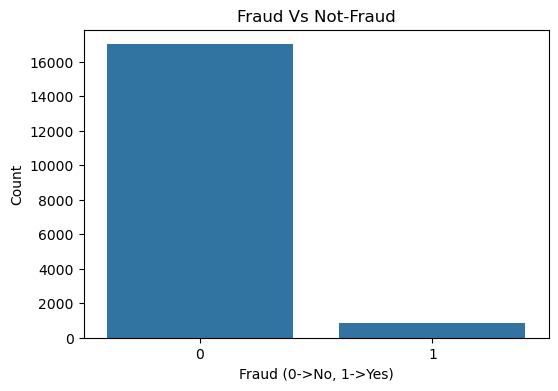

In [26]:
#Distribution of Fraudlent

plt.figure(figsize=(6,4))
sns.countplot(x='fraudulent', data=df)
plt.title("Fraud Vs Not-Fraud")
plt.xlabel("Fraud (0->No, 1->Yes)")
plt.ylabel('Count')
plt.show()

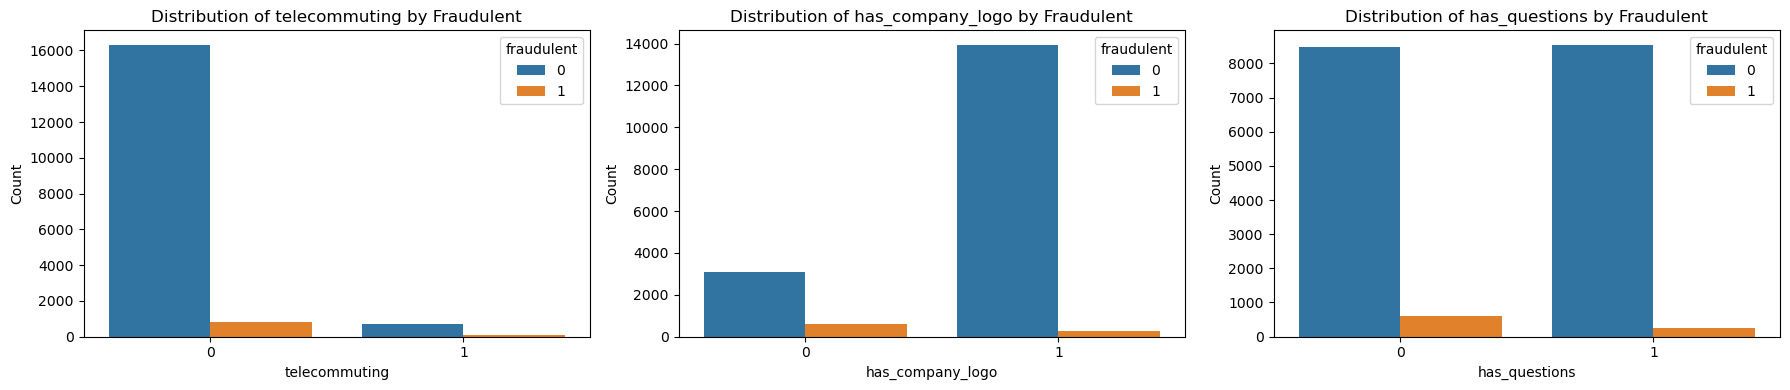

In [27]:
num_cols = ['telecommuting', 'has_company_logo', 'has_questions']
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))

axes = np.array(axes).flatten()

for i, col in enumerate(num_cols):
    sns.countplot(x=col, hue='fraudulent', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Fraudulent')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

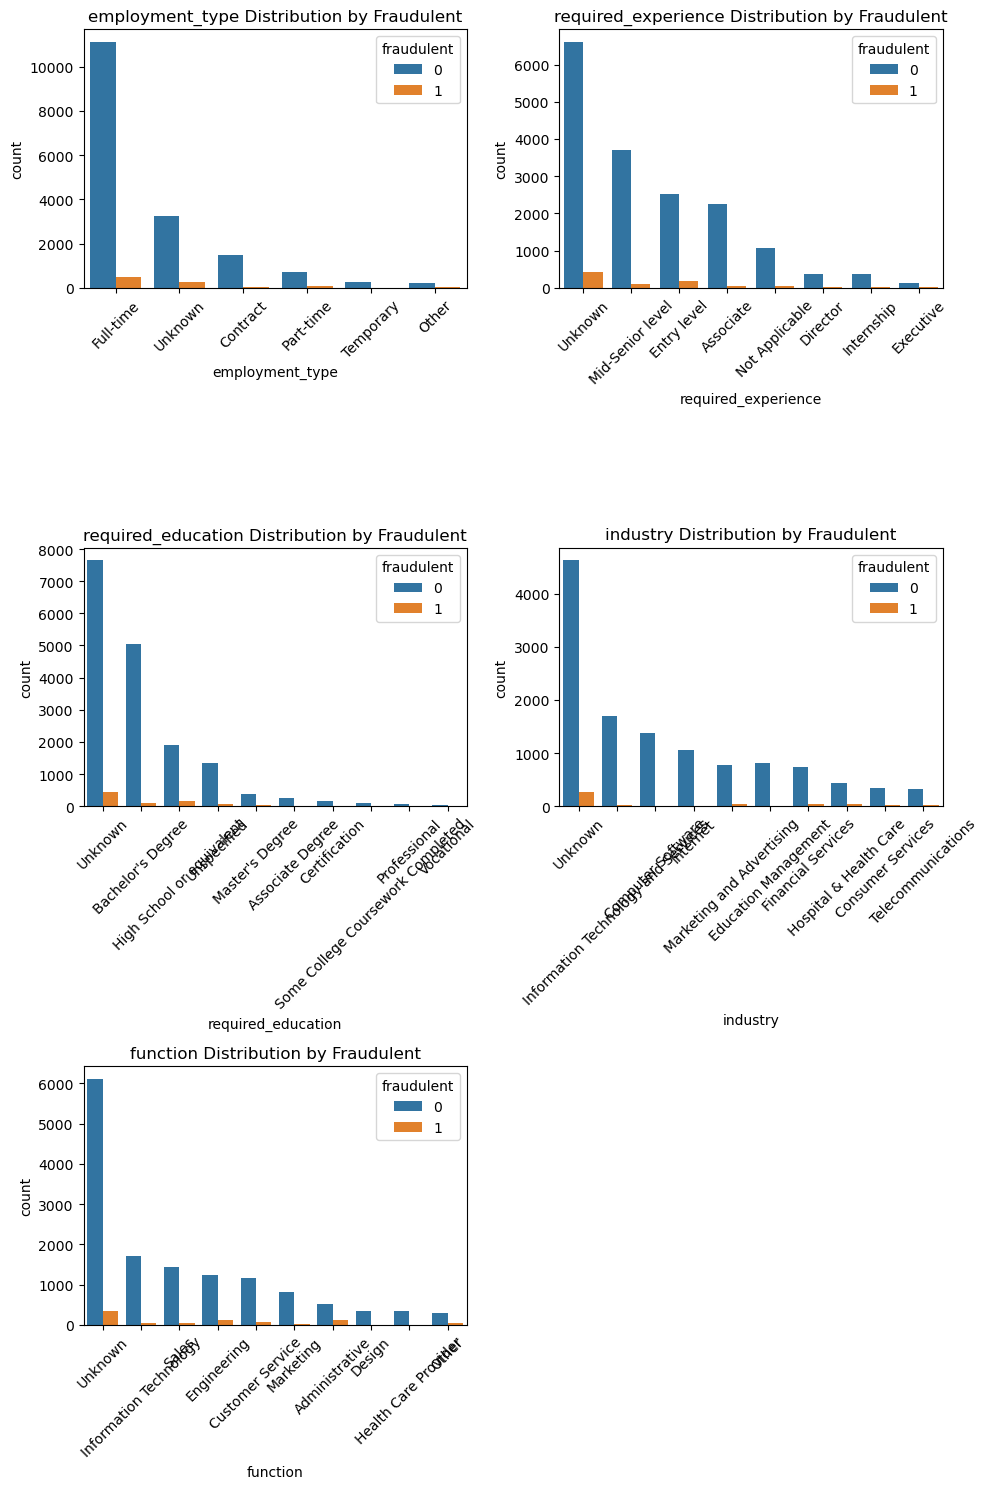

In [28]:
cat_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

n_cols = 2
n_rows = int(np.ceil(len(cat_cols)/ n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    order = df[col].value_counts().index[:10]
    sns.countplot(x=col, hue='fraudulent', data=df, order=order, ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Fraudulent')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


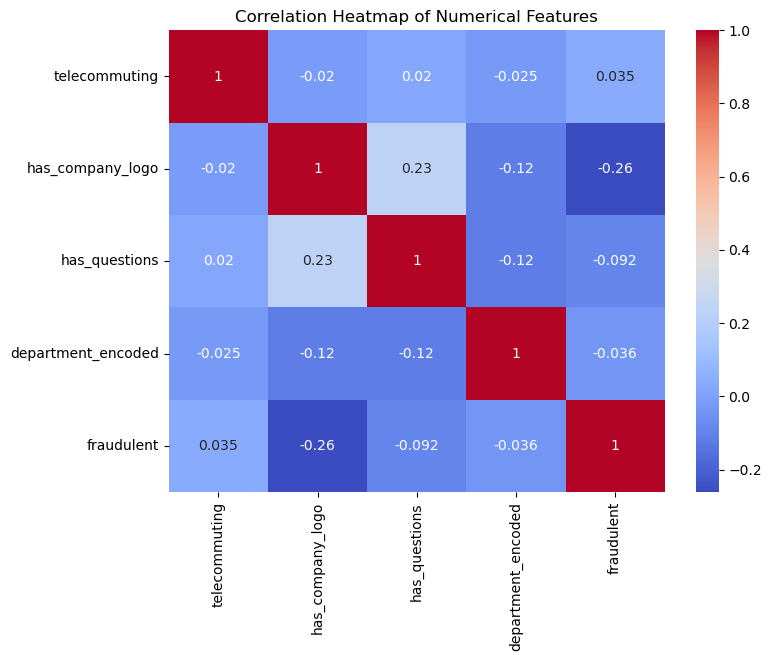

In [29]:
num_features = ['telecommuting', 'has_company_logo', 'has_questions', 'department_encoded']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_features + ['fraudulent']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


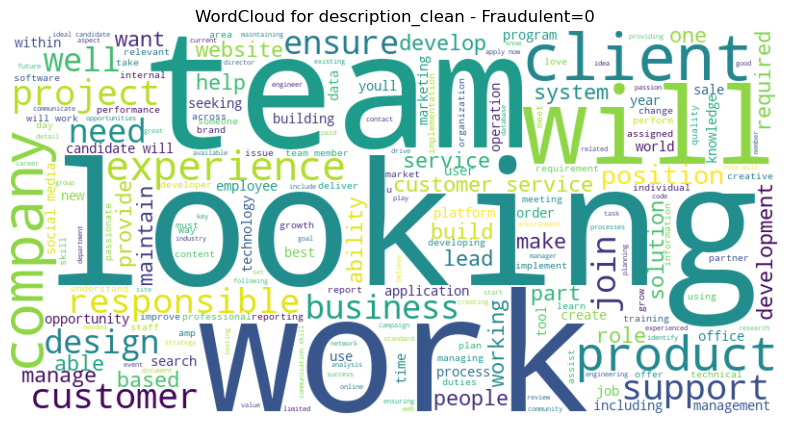

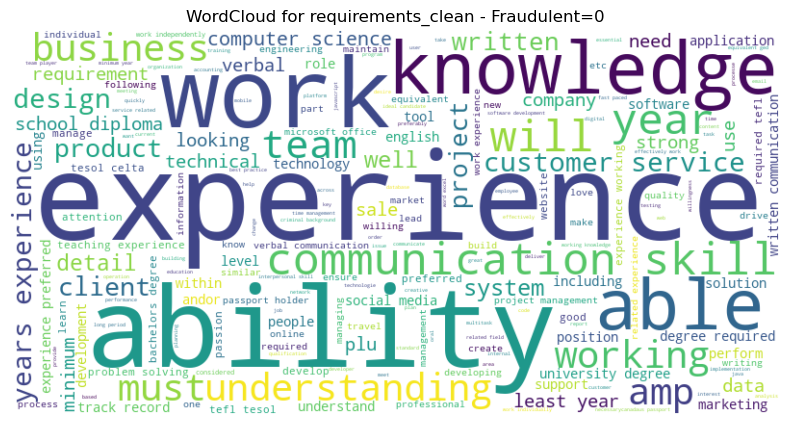

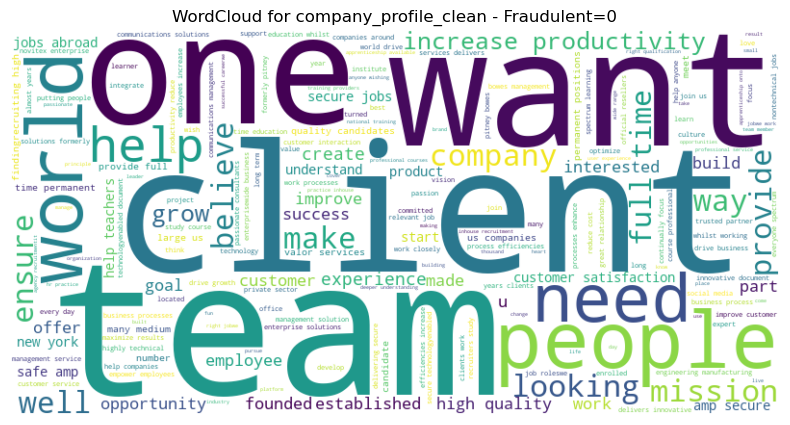

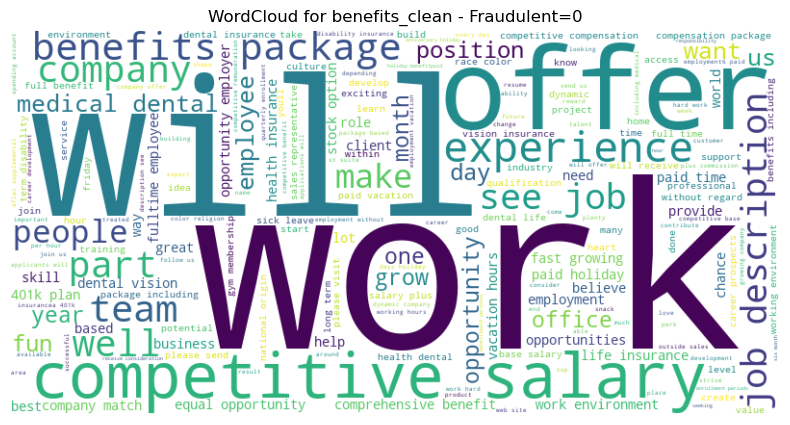

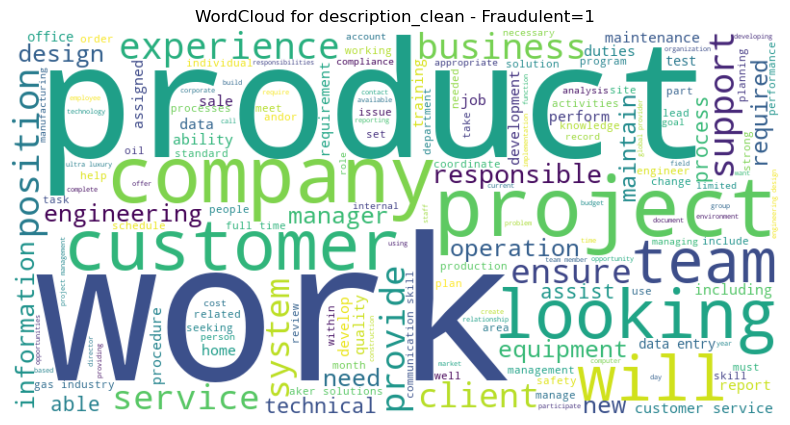

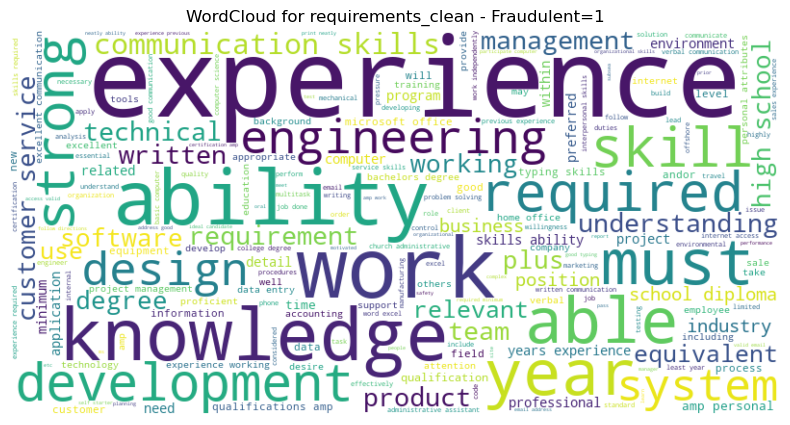

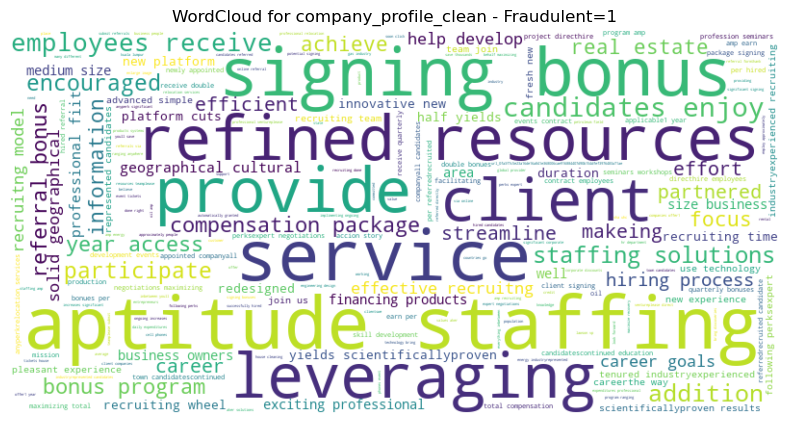

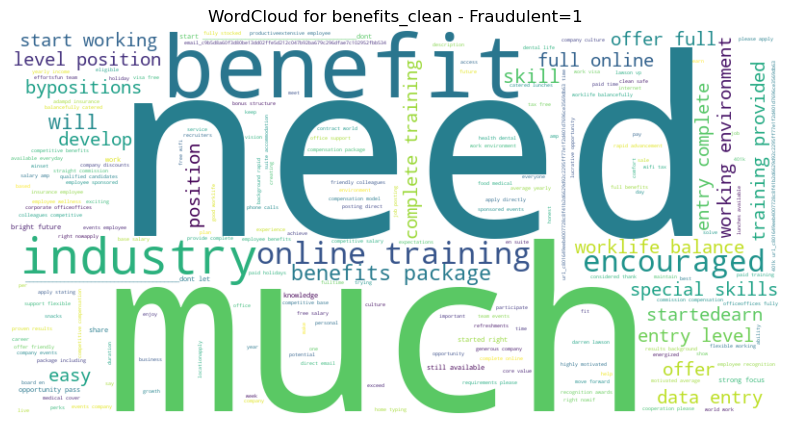

In [30]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

for fraud_status in [0, 1]:
    subset = df[df['fraudulent'] == fraud_status]
    for col in text_cols:
        plot_wordcloud(subset[col], f"WordCloud for {col} - Fraudulent={fraud_status}")


In [31]:
industry_counts = df['industry'].value_counts()
rare_industries = industry_counts[industry_counts < 20].index  

df['industry_grouped'] = df['industry'].apply(lambda x: 'Other' if x in rare_industries else x)


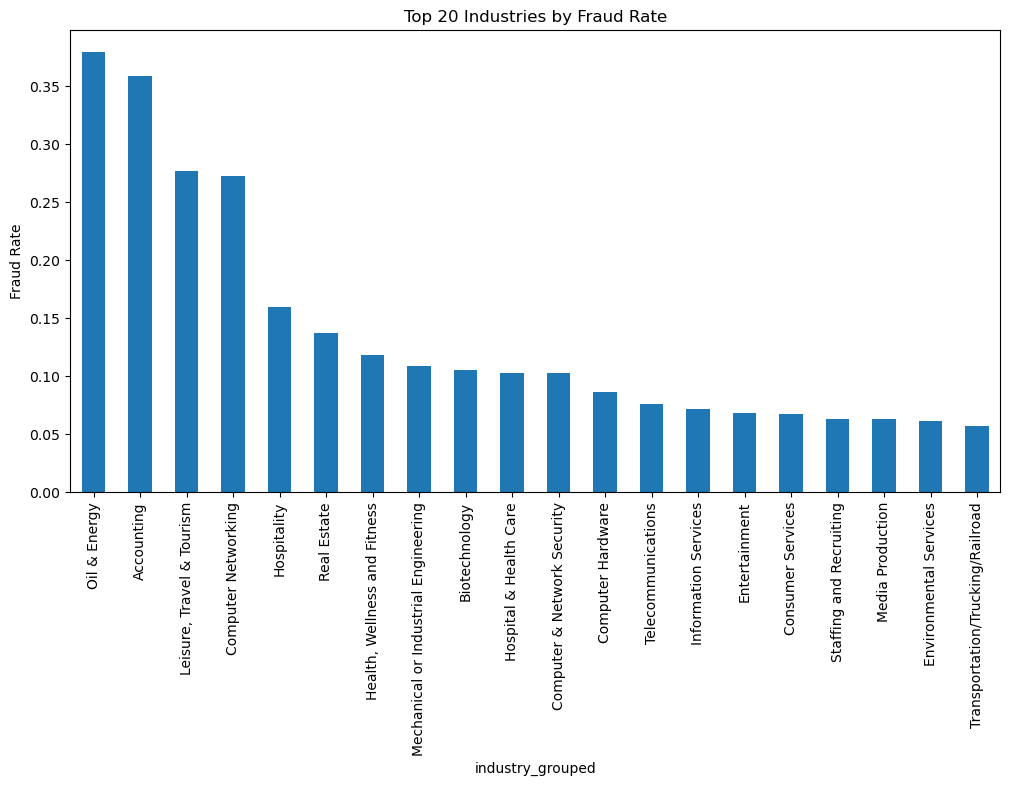

In [32]:
plt.figure(figsize=(12,6))
industry_fraud = df.groupby('industry_grouped')['fraudulent'].mean().sort_values(ascending=False).head(20)
industry_fraud.plot(kind='bar')
plt.ylabel('Fraud Rate')
plt.title('Top 20 Industries by Fraud Rate')
plt.show()



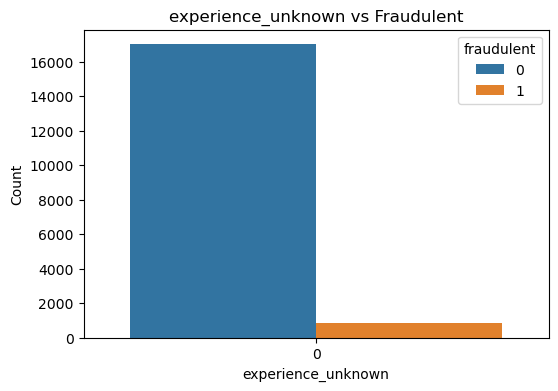

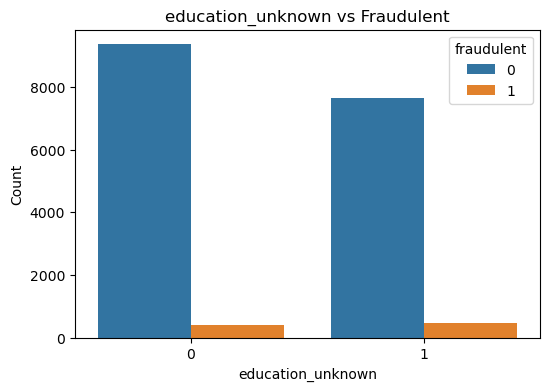

In [33]:
df['experience_unknown'] = df['required_experience'].apply(lambda x: 1 if x.lower() == 'not determined' else 0)
df['education_unknown'] = df['required_education'].apply(lambda x: 1 if x.lower() == 'unknown' else 0)
for col in ['experience_unknown', 'education_unknown']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='fraudulent', data=df)
    plt.title(f'{col} vs Fraudulent')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [34]:
unique_values = df['industry'].unique()
print(unique_values)
print(f"Total unique: {len(unique_values)}")


['Unknown' 'Marketing and Advertising' 'Computer Software'
 'Hospital & Health Care' 'Online Media'
 'Information Technology and Services' 'Financial Services'
 'Management Consulting' 'Events Services' 'Internet'
 'Facilities Services' 'Consumer Electronics' 'Telecommunications'
 'Consumer Services' 'Construction' 'Oil & Energy' 'Education Management'
 'Building Materials' 'Banking' 'Food & Beverages' 'Food Production'
 'Health, Wellness and Fitness' 'Insurance' 'E-Learning' 'Cosmetics'
 'Staffing and Recruiting' 'Venture Capital & Private Equity'
 'Leisure, Travel & Tourism' 'Human Resources' 'Pharmaceuticals' 'Farming'
 'Legal Services' 'Luxury Goods & Jewelry' 'Machinery' 'Real Estate'
 'Mechanical or Industrial Engineering'
 'Public Relations and Communications' 'Consumer Goods' 'Medical Practice'
 'Electrical/Electronic Manufacturing' 'Hospitality' 'Music'
 'Market Research' 'Automotive' 'Philanthropy' 'Utilities'
 'Primary/Secondary Education' 'Logistics and Supply Chain' 'Desig

KEY INSIGHTS :
1) Fraud job postings doesn't have company Logo.
2) Doesn't  has_questions i.e. no questions asked.
3) Experience and education requirement is not specified by the company that posted job.
4) There is also no information about industry distribution if a posting is fraud.
5) The fake job is posted mostly for Full-Time job roles.
6) Top industry with fake job rate is oil and energy.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    17880 non-null  object
 1   location                 17880 non-null  object
 2   company_profile          17880 non-null  object
 3   description              17880 non-null  object
 4   requirements             17880 non-null  object
 5   benefits                 17880 non-null  object
 6   telecommuting            17880 non-null  int64 
 7   has_company_logo         17880 non-null  int64 
 8   has_questions            17880 non-null  int64 
 9   employment_type          17880 non-null  object
 10  required_experience      17880 non-null  object
 11  required_education       17880 non-null  object
 12  industry                 17880 non-null  object
 13  function                 17880 non-null  object
 14  fraudulent               17880 non-nul

In [ ]:
#df_encoded.to_csv('C:/Users/nagar/HelloPython/AnalyticalProjects/job-authentication/notebook/data/processed_data.csv', index=False)

In [37]:
print(df_with_text_features.columns)
print(df_with_text_features.info())


Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type',
       ...
       'benefits_clean_tfidf_what', 'benefits_clean_tfidf_where',
       'benefits_clean_tfidf_who', 'benefits_clean_tfidf_will',
       'benefits_clean_tfidf_with', 'benefits_clean_tfidf_work',
       'benefits_clean_tfidf_working', 'benefits_clean_tfidf_year',
       'benefits_clean_tfidf_you', 'benefits_clean_tfidf_your'],
      dtype='object', length=421)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Columns: 421 entries, title to benefits_clean_tfidf_your
dtypes: float64(400), int32(1), int64(4), int8(1), object(15)
memory usage: 57.2+ MB
None


In [ ]:
#df_with_text_features.to_csv('C:/Users/nagar/HelloPython/AnalyticalProjects/job-authentication/notebook/data/processed_data_with_text_info.csv', index=False)